# Quadcopter

The quadcopter is modelled with the following states:


| State | Description |
| --- | --- |
| $p^{(I)}$ | Position in the inertial frame |
| $v^{(I)}$ | Velocity in the inertial frame |
| $\phi^{(I)}=[\alpha,\ \beta,\ \gamma]$ | Orientation in the inertial frame |
| $\omega^{(B)}$ | Angular velocity in the body frame |

To model the dynamics of the states we introduce the rotation matrix from the body frame to the inertial frame as:
$$
\begin{align}
  R = R_z(\alpha) \, R_y(\beta) \, R_x(\gamma) &=
  \begin{bmatrix}
    \cos \alpha & -\sin \alpha & 0 \\
    \sin \alpha &  \cos \alpha & 0 \\
              0 &            0 & 1 \\
  \end{bmatrix}
  \begin{bmatrix}
     \cos \beta & 0 & \sin \beta \\
              0 & 1 &          0 \\
    -\sin \beta & 0 & \cos \beta \\
  \end{bmatrix}
  \begin{bmatrix}
    1 &  0          &            0 \\
    0 & \cos \gamma & -\sin \gamma \\
    0 & \sin \gamma &  \cos \gamma \\
  \end{bmatrix} \\
  &= \begin{bmatrix}
        \cos\alpha\cos\beta &
          \cos\alpha\sin\beta\sin\gamma - \sin\alpha\cos\gamma &
          \cos\alpha\sin\beta\cos\gamma + \sin\alpha\sin\gamma \\
        \sin\alpha\cos\beta &
          \sin\alpha\sin\beta\sin\gamma + \cos\alpha\cos\gamma &
          \sin\alpha\sin\beta\cos\gamma - \cos\alpha\sin\gamma \\
       -\sin\beta & \cos\beta\sin\gamma & \cos\beta\cos\gamma \\
  \end{bmatrix}
\end{align}
$$

We also introduce the total force vector for the body frame as:
\begin{equation}
f_\text{tot}^{(I)} = \begin{bmatrix} 0 \\ 0 \\ \sum_{i=1}^4 f_i\end{bmatrix}
\end{equation}
And have the total acceleration in the inertial frame as:
\begin{equation}
\dot v^{(i)} = \frac{1}{m} R f_\text{tot}^{(B)} - g
\end{equation}
With the velocity in the body frame, we can directly obtain:
\begin{equation}
\dot p^{(I)} = v^{(I)}
\end{equation}
For the angular velocity in the inertial frame we have:
\begin{equation}
\dot \phi^{(I)}= R \omega^{(B)}
\end{equation}
Finally, we have for the angular acceleration in the body frame:
$$
\begin{align}
\dot \omega^{(B)} = 
J^{-1}
\left(
\underbrace{
\begin{bmatrix}
d_{y_1}& d_{y_2}& d_{y_3}& d_{y_4}\\
d_{x_1}& d_{x_2}& d_{x_3}& d_{x_4}\\
d_{\tau}& -d_{\tau}& d_{\tau}& -d_{\tau}\\
\end{bmatrix}
}_{D}
\begin{bmatrix}
f_1\\
f_2\\
f_3\\
f_4
\end{bmatrix}
-\omega^{(B)}\times J\omega^{(B)}\right)
\end{align}
$$
where $(d_{y_i}, d_{x_i})$ is the distances from the center of mass to the i-th propeller and $d_\tau\in[-1,1]$ denotes the direction of rotation.

In [1]:
!pwd

/Users/felixfiedler/Documents/git_repos/2022_do_mpc_paper/01_Example_Systems/quadcopter


In [21]:
import qcmodel
import qccontrol
from plot_results import plot_results
import importlib
import numpy as np

importlib.reload(qccontrol)

<module 'qccontrol' from '/Users/felixfiedler/Documents/git_repos/2022_do_mpc_paper/01_Example_Systems/quadcopter/qccontrol.py'>

In [22]:

qc = qcmodel.Quadcopter()
qc.get_model()


In [23]:

t_step = 0.05
simulator = qccontrol.get_simulator(t_step, qc)

x0 = np.zeros((12,1))
simulator.x0 = x0

In [19]:

lqr = qccontrol.get_LQR(t_step, qc)

/Users/felixfiedler/Documents/git_repos/2022_do_mpc_paper/01_Example_Systems/quadcopter/../../../do-mpc/do_mpc/model/_linearmodel.py:296: UserWarning: sampling time is 0.05
  warnings.warn('sampling time is {}'.format(t_sample))
/Users/felixfiedler/Documents/git_repos/2022_do_mpc_paper/01_Example_Systems/quadcopter/../../../do-mpc/do_mpc/controller/_lqr.py:456: UserWarning: discrete infinite horizon gain will be computed since prediction horizon is set to default value 0
  warnings.warn('discrete infinite horizon gain will be computed since prediction horizon is set to default value 0')


In [15]:

qccontrol.lqr_flyto(simulator, lqr, pos_setpoint=np.array([1,1,1]).reshape(-1,1))
qccontrol.lqr_flyto(simulator, lqr, pos_setpoint=np.array([1,1,2]).reshape(-1,1))
qccontrol.lqr_flyto(simulator, lqr, pos_setpoint=np.array([1,1,2]).reshape(-1,1))
fig, ax = plot_results(qc, lqr.data, figsize=(12,8)) 

AttributeError: 'LQR' object has no attribute 'data'

In [24]:

mpc, mpc_tvp_template = qccontrol.get_MPC(t_step, qc)

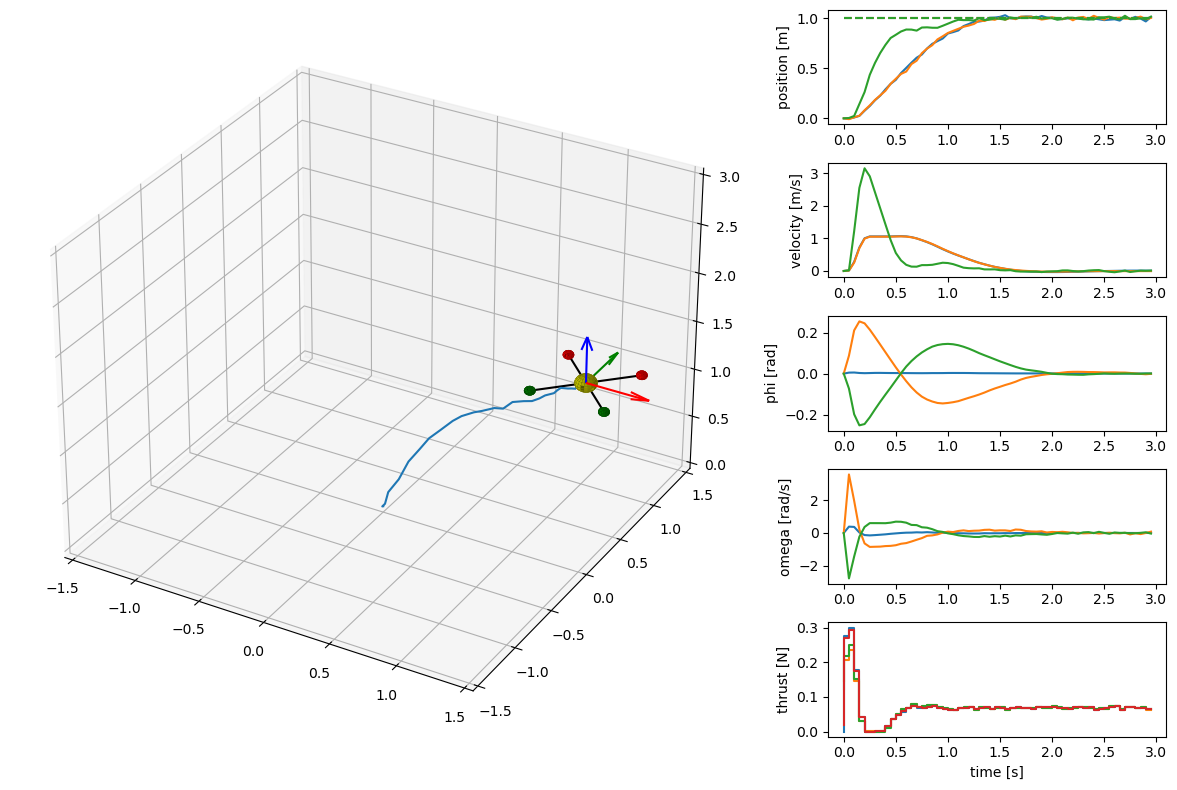

In [25]:
mpc.reset_history()
simulator.reset_history()
simulator.x0 = np.zeros((qc.model.n_x,1))

qccontrol.mpc_flyto(simulator, mpc, mpc_tvp_template)
fig, ax = plot_results(qc, mpc.data, figsize=(12,8)) 

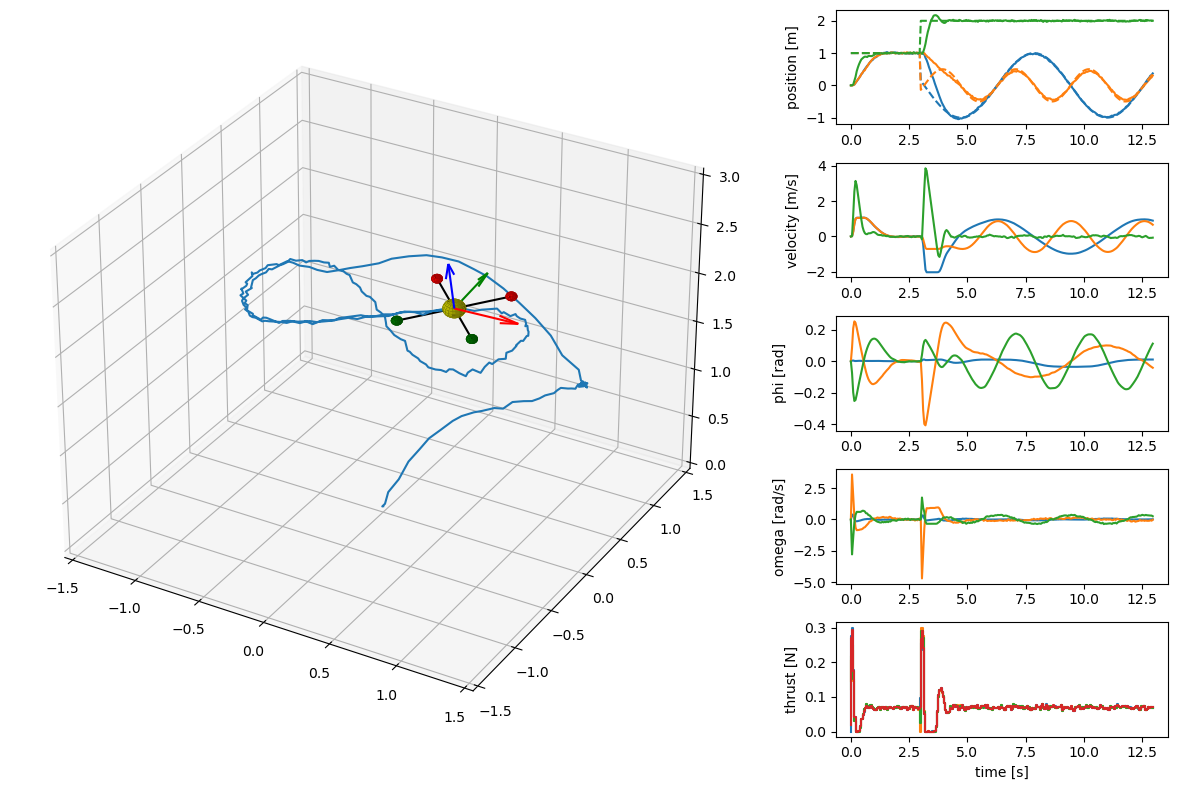

In [26]:
# mpc.reset_history()
# simulator.reset_history()
# simulator.x0 = np.zeros((qc.model.n_x,1))

qccontrol.mpc_figure_eight(simulator, mpc, mpc_tvp_template)
fig, ax = plot_results(qc, mpc.data, figsize=(12,8)) 